# Nifty 50 Data Analysis

This analysis is conducted to understand the market trends for different stocks from the nifty 50 dataset.

In [13]:
from nsepy import get_history
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np

Getting the stock value for SBI Bank Ltd.

In [29]:
sbin = get_history(symbol='SBIN',
                    start=date(2007,1,1), 
                    end=date(2021,1,11))
sbin.head(15)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-01-02,SBIN,EQ,1245.60,1250.00,1260.00,1243.00,1253.00,1253.55,1252.58,408144,5.112345e+13,NaN,116205.0,0.2847
2007-01-03,SBIN,EQ,1253.55,1250.00,1269.90,1237.10,1266.45,1264.85,1262.83,682554,8.619525e+13,NaN,241975.0,0.3545
2007-01-04,SBIN,EQ,1264.85,1270.00,1280.00,1237.25,1239.90,1243.00,1260.17,654440,8.247060e+13,NaN,149712.0,0.2288
2007-01-05,SBIN,EQ,1243.00,1241.00,1257.85,1233.10,1247.00,1244.10,1245.31,696227,8.670172e+13,NaN,233986.0,0.3361
2007-01-08,SBIN,EQ,1244.10,1248.80,1248.80,1207.05,1209.00,1213.70,1223.52,874701,1.070217e+14,NaN,385135.0,0.4403
2007-01-09,SBIN,EQ,1213.70,1219.85,1222.40,1171.10,1173.50,1174.90,1196.18,1503471,1.798419e+14,NaN,524945.0,0.3492
2007-01-10,SBIN,EQ,1174.90,1171.00,1176.00,1132.85,1134.50,1136.40,1152.78,971222,1.119608e+14,NaN,290200.0,0.2988
2007-01-11,SBIN,EQ,1136.40,1145.00,1159.00,1132.00,1156.90,1147.45,1146.29,1749734,2.005698e+14,NaN,762558.0,0.4358
2007-01-12,SBIN,EQ,1147.45,1162.00,1236.25,1160.00,1219.80,1225.45,1219.37,1926908,2.349623e+14,NaN,548025.0,0.2844


## High Level EDA

In [30]:
sbin = sbin.rename_axis('Date').reset_index()

In [31]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-01-02,SBIN,EQ,1245.60,1250.0,1260.00,1243.00,1253.00,1253.55,1252.58,408144,5.112345e+13,NaN,116205.0,0.2847
1,2007-01-03,SBIN,EQ,1253.55,1250.0,1269.90,1237.10,1266.45,1264.85,1262.83,682554,8.619525e+13,NaN,241975.0,0.3545
2,2007-01-04,SBIN,EQ,1264.85,1270.0,1280.00,1237.25,1239.90,1243.00,1260.17,654440,8.247060e+13,NaN,149712.0,0.2288
3,2007-01-05,SBIN,EQ,1243.00,1241.0,1257.85,1233.10,1247.00,1244.10,1245.31,696227,8.670172e+13,NaN,233986.0,0.3361
4,2007-01-08,SBIN,EQ,1244.10,1248.8,1248.80,1207.05,1209.00,1213.70,1223.52,874701,1.070217e+14,NaN,385135.0,0.4403


In [32]:
sbin.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [34]:
sbin['Date']= pd.to_datetime(sbin['Date'])

In [36]:
sbin.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

## Numerical Columns Describe

In [37]:
sbin.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3.478000e+03,3.478000e+03,2.385000e+03,3.473000e+03,3473.000000
mean,1232.820385,1234.290886,1252.990742,1213.655204,1232.311544,1232.547269,1233.632542,1.309388e+07,5.349911e+14,1.440866e+05,3.768150e+06,0.309886
std,936.889137,938.231700,950.977028,924.128458,936.760396,937.041133,937.733060,1.969661e+07,4.276356e+14,9.942333e+04,5.455890e+06,0.103645
min,150.850000,151.950000,153.200000,148.250000,151.100000,150.850000,151.820000,5.862400e+04,9.088155e+12,4.016000e+03,1.799700e+04,0.067800
25%,276.087500,276.887500,279.762500,272.500000,275.950000,276.087500,276.440000,1.762226e+06,2.959753e+14,8.406700e+04,4.916440e+05,0.233100
50%,1278.825000,1274.775000,1309.325000,1241.550000,1279.125000,1278.825000,1276.610000,3.396520e+06,4.207699e+14,1.145120e+05,1.149948e+06,0.301900
75%,2103.112500,2111.500000,2138.987500,2076.375000,2101.000000,2103.112500,2111.142500,1.713937e+07,6.206695e+14,1.671050e+05,5.555959e+06,0.379800
max,3489.950000,3505.000000,3515.000000,3451.350000,3499.000000,3489.950000,3485.250000,2.626771e+08,8.162141e+15,1.057768e+06,1.333311e+08,0.948200


<AxesSubplot:>

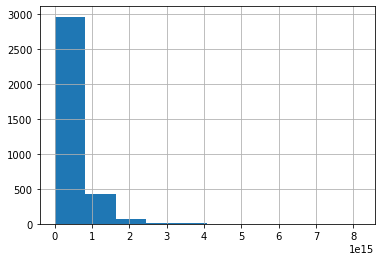

In [38]:
sbin["Turnover"].hist()     #Matplotlib Version

In [40]:
px.histogram(sbin, x= 'Date', y= 'Turnover')  #Plotly Version